[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skylercain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


All translations loaded. Total rows: 217719
After merging with metadata. Total rows: 217719
After mapping authors. Total rows: 195618
Translation Counts:
translation
WBT    27947
KJV    27946
ASV    27946
BBE    27946
YLT    27946
WEB    27945
DBY    27942
Name: count, dtype: int64


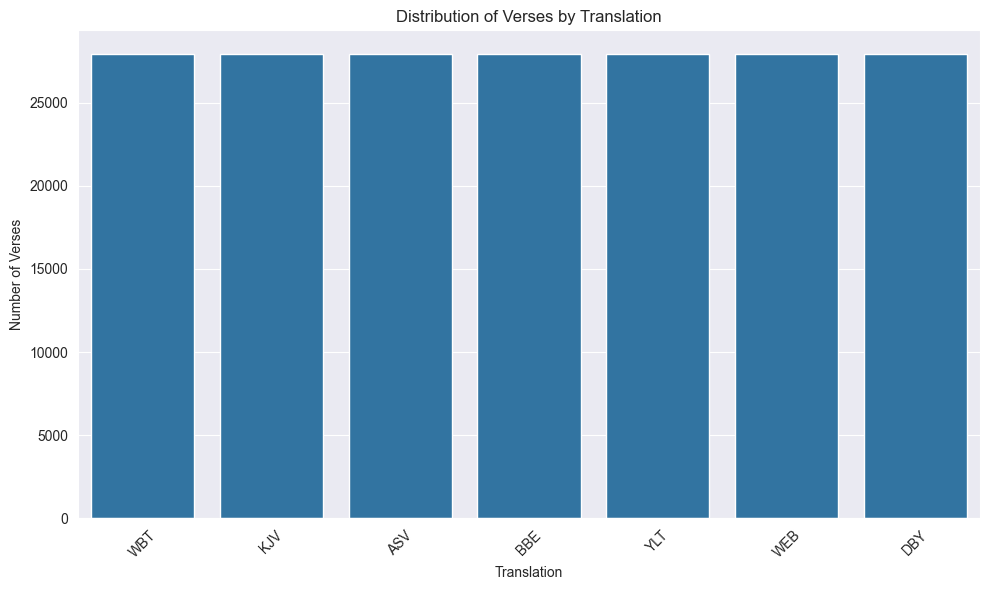


Book Counts:
book_name
Psalms      17227
Genesis     10731
Jeremiah     9548
Isaiah       9044
Numbers      9016
            ...  
Philemon      175
Jude          175
Obadiah       147
3 John        103
2 John         91
Name: count, Length: 61, dtype: int64


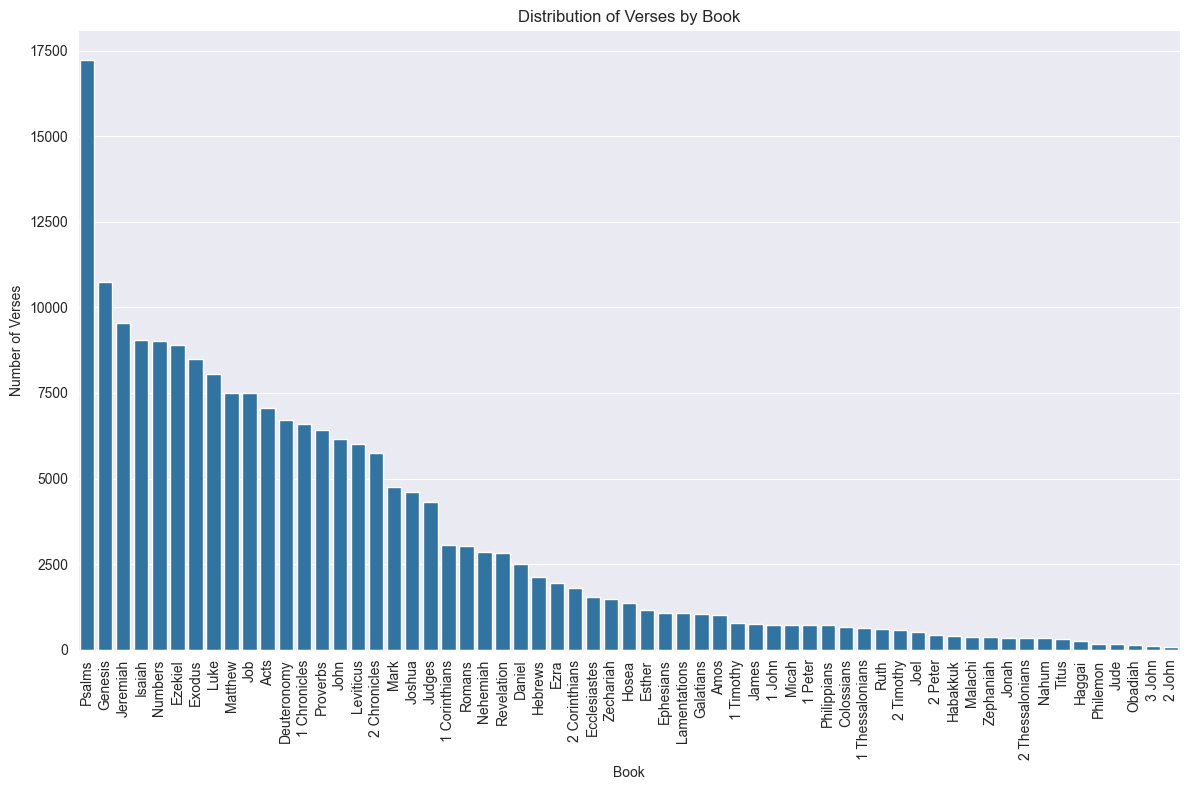


Author Counts:
author
Moses                                                                      40964
David,Asaph, Ezra, the sons of Korah, Heman, Ethan, Moses                  17227
Luke                                                                       15104
Ezra                                                                       14308
Paul                                                                       14231
Jeremiah                                                                   10626
John, the Apostle                                                           9911
Isaiah                                                                      9044
Ezekiel                                                                     8911
Matthew                                                                     7496
Job,Moses                                                                   7490
Solomon ,Agur(30) and Lemuel(31)                                            6405
Samue

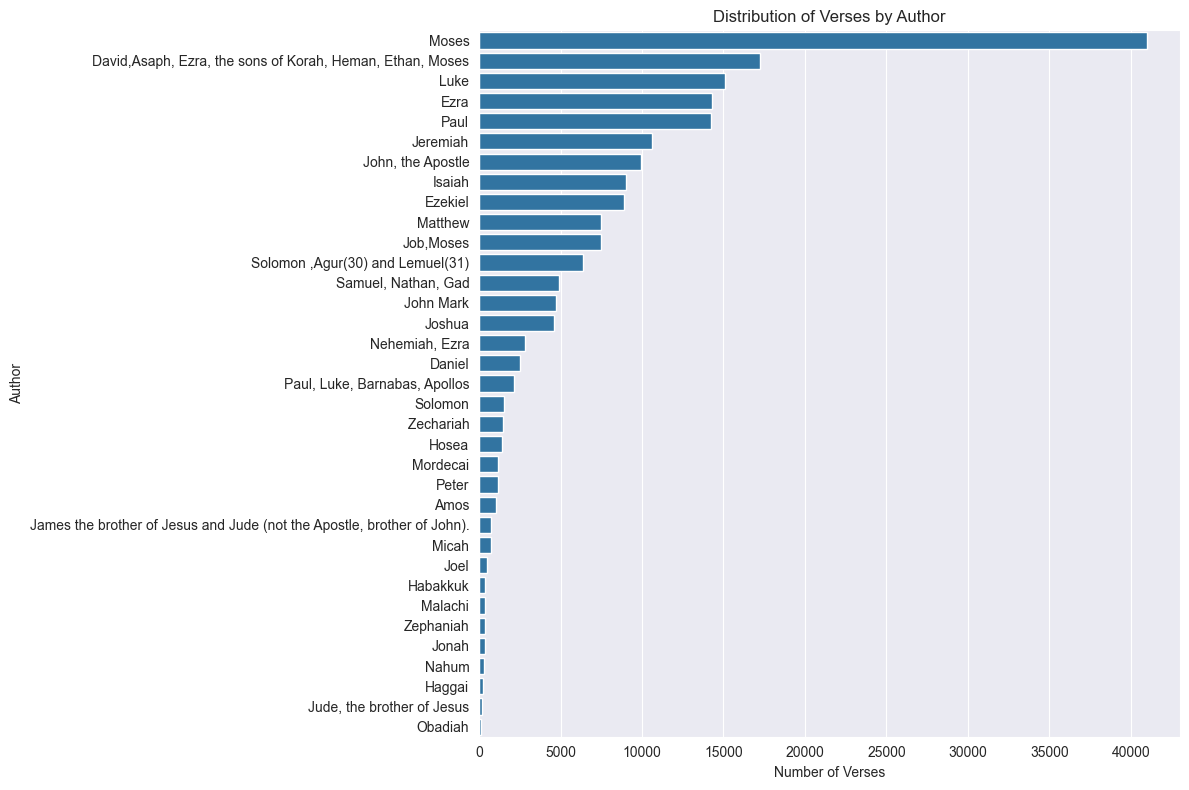


Verse Lengths Distribution:
verse_length
0        39
1         6
2       316
3      2301
4      5121
5      9052
6     14760
7     17241
8     18209
9     16857
10    15629
11    14639
12    13241
13    11731
14    10366
15     8909
16     7529
17     6359
18     5045
19     4201
20     3310
21     2655
22     2084
23     1577
24     1224
25      868
26      626
27      478
28      393
29      215
30      166
31      120
32       91
33       84
34       58
35       36
36       24
37       21
38       15
39        5
40        2
41        3
42        5
43        2
44        3
45        1
49        1
Name: count, dtype: int64


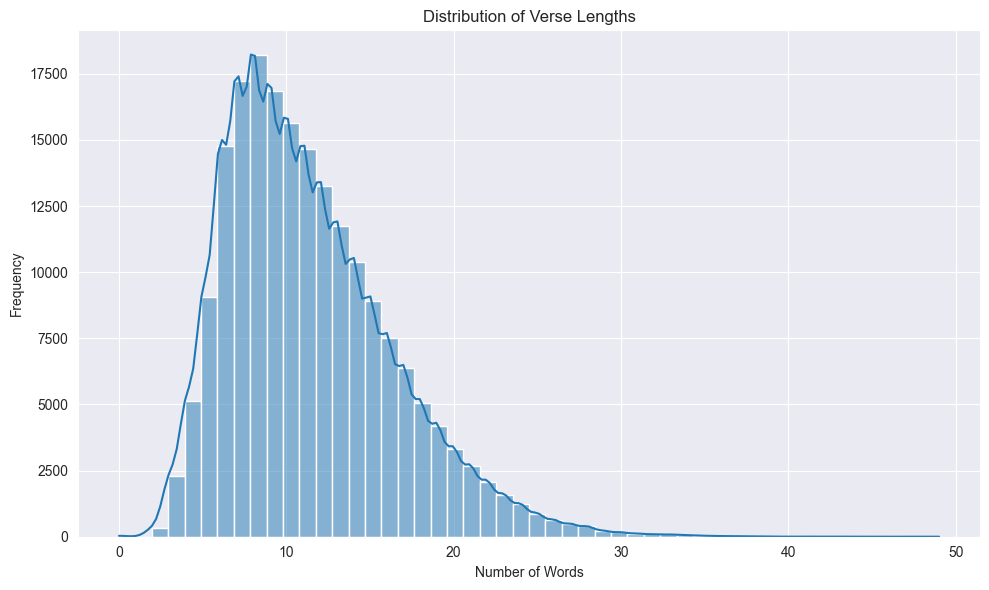


Book Proportions:
book_name
Psalms      0.088064
Genesis     0.054857
Jeremiah    0.048809
Isaiah      0.046233
Numbers     0.046090
              ...   
Philemon    0.000895
Jude        0.000895
Obadiah     0.000751
3 John      0.000527
2 John      0.000465
Name: count, Length: 61, dtype: float64


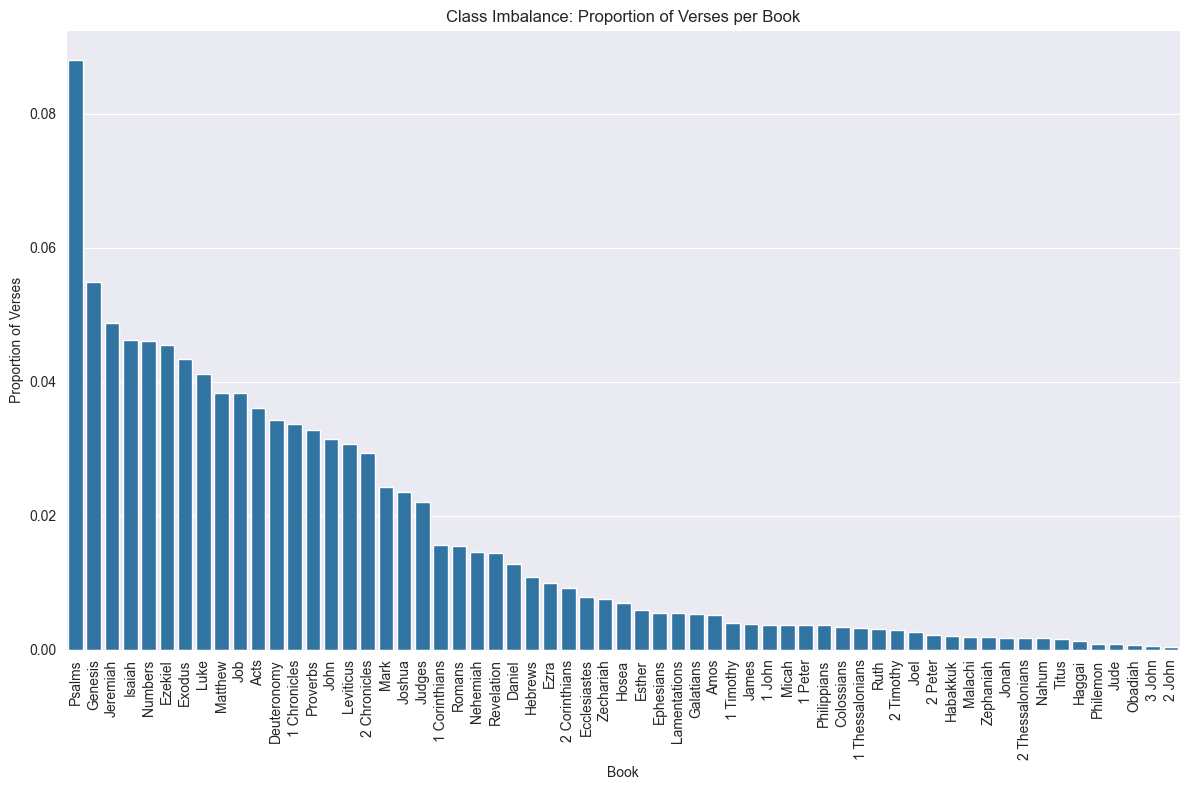


Author Proportions:
author
Moses                                                                      0.209408
David,Asaph, Ezra, the sons of Korah, Heman, Ethan, Moses                  0.088064
Luke                                                                       0.077212
Ezra                                                                       0.073143
Paul                                                                       0.072749
Jeremiah                                                                   0.054320
John, the Apostle                                                          0.050665
Isaiah                                                                     0.046233
Ezekiel                                                                    0.045553
Matthew                                                                    0.038320
Job,Moses                                                                  0.038289
Solomon ,Agur(30) and Lemuel(31)                

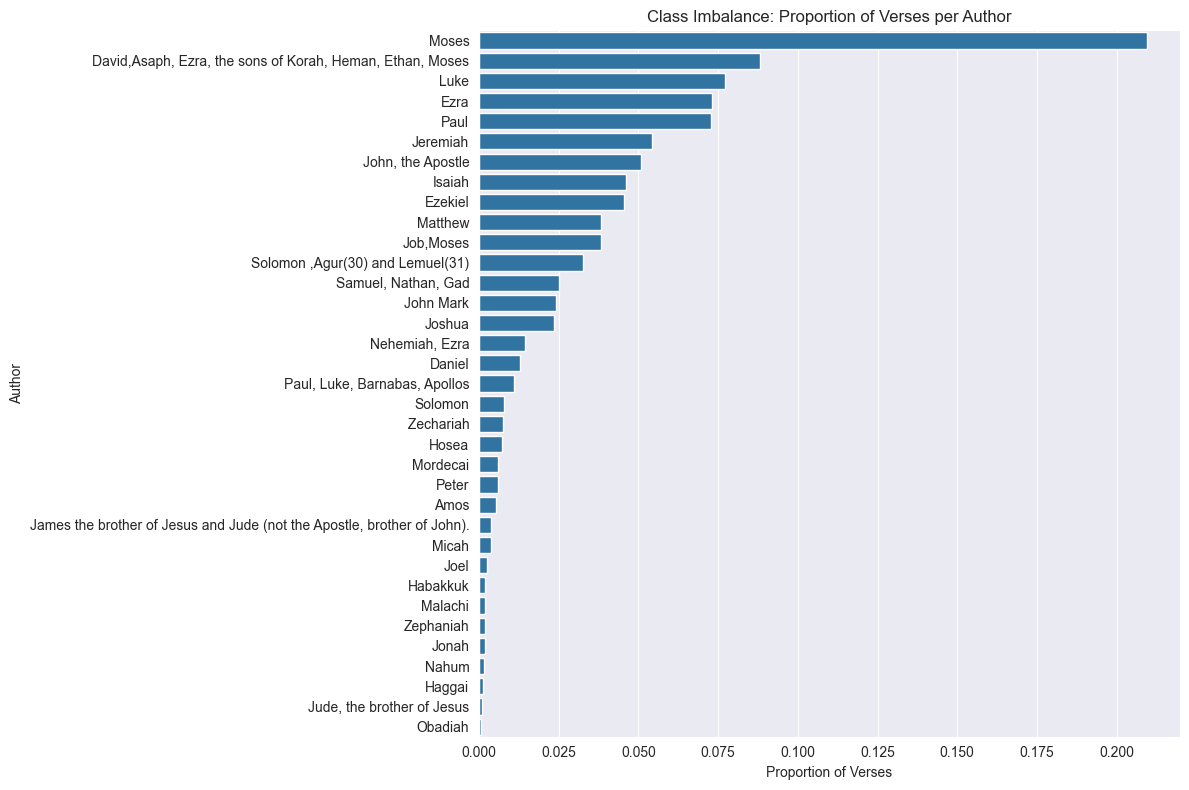

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

# Initialize stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Load Bible translations
columns = ['verse_id', 'book_id', 'chapter', 'verse', 'text']
translations = ['t_kjv.csv', 't_asv.csv', 't_bbe.csv', 't_dby.csv', 't_wbt.csv', 't_web.csv', 't_ylt.csv']
translation_names = ['KJV', 'ASV', 'BBE', 'DBY', 'WBT', 'WEB', 'YLT']

all_translations = pd.DataFrame()
for file, name in zip(translations, translation_names):
    file_path = f'bible_data/bible_databases-master/bible_databases-master/csv/{file}'
    df = pd.read_csv(file_path)
    df.columns = columns
    df['translation'] = name
    df['cleaned_text'] = df['text'].apply(preprocess_text)
    all_translations = pd.concat([all_translations, df], ignore_index=True)

print(f"All translations loaded. Total rows: {len(all_translations)}")

# Merge with book metadata
key_english = pd.read_csv('bible_data/bible_databases-master/bible_databases-master/csv/key_english.csv')
key_english.columns = ['book_id', 'book_name', 'testament', 'genre']
all_translations = all_translations.merge(key_english, on='book_id', how='left')
print(f"After merging with metadata. Total rows: {len(all_translations)}")

# Map authors to verses using the provided author list
author_list = {
    "Genesis": "Moses",
    "Exodus": "Moses",
    "Leviticus": "Moses",
    "Numbers": "Moses",
    "Deuteronomy": "Moses",
    "Joshua": "Joshua",
    "Judges": "Samuel, Nathan, Gad",
    "Ruth": "Samuel, Nathan, Gad",
    "1 Samuel (1 Kings)": "Samuel, Nathan, Gad",
    "2 Samuel (2 Kings)": "Samuel, Nathan, Gad",
    "1 Kings (3 Kings)": "Jeremiah",
    "2 Kings (4 Kings)": "Jeremiah",
    "1 Chronicles": "Ezra",
    "2 Chronicles": "Ezra",
    "Ezra": "Ezra",
    "Nehemiah": "Nehemiah, Ezra",
    "Esther": "Mordecai",
    "Job": "Job,Moses",
    "Psalms": "David,Asaph, Ezra, the sons of Korah, Heman, Ethan, Moses",
    "Proverbs": "Solomon ,Agur(30) and Lemuel(31)",
    "Ecclesiastes": "Solomon",
    "Song of Solomon (Canticles)": "Solomon",
    "Isaiah": "Isaiah",
    "Jeremiah": "Jeremiah",
    "Lamentations": "Jeremiah",
    "Ezekiel": "Ezekiel",
    "Daniel": "Daniel",
    "Hosea": "Hosea",
    "Joel": "Joel",
    "Amos": "Amos",
    "Obadiah": "Obadiah",
    "Jonah": "Jonah",
    "Micah": "Micah",
    "Nahum": "Nahum",
    "Habakkuk": "Habakkuk",
    "Zephaniah": "Zephaniah",
    "Haggai": "Haggai",
    "Zechariah": " Zechariah",
    "Malachi": "Malachi",
    "Matthew": "Matthew",
    "Mark": "John Mark",
    "Luke": "Luke",
    "John": "John, the Apostle",
    "Acts": "Luke",
    "Romans": "Paul",
    "1 Corinthians": "Paul",
    "2 Corinthians": "Paul",
    "Galatians": "Paul",
    "Ephesians": "Paul",
    "Philippians": "Paul",
    "Colossians": "Paul",
    "1 Thessalonians": "Paul",
    "2 Thessalonians": "Paul",
    "1 Timothy": "Paul",
    "2 Timothy": "Paul",
    "Titus": "Paul",
    "Philemon": "Paul",
    "Hebrews": "Paul, Luke, Barnabas, Apollos",
    "James": "James the brother of Jesus and Jude (not the Apostle, brother of John).",
    "1 Peter": "Peter",
    "2 Peter": "Peter",
    "1 John": "John, the Apostle",
    "2 John": "John, the Apostle",
    "3 John": "John, the Apostle",
    "Jude": "Jude, the brother of Jesus",
    "Revelation": "John, the Apostle"
}
all_translations['author'] = all_translations['book_name'].map(author_list)
all_translations = all_translations.dropna(subset=['author'])
print(f"After mapping authors. Total rows: {len(all_translations)}")

# Distribution of verses by translation
translation_counts = all_translations['translation'].value_counts()
print("Translation Counts:")
print(translation_counts)
translation_counts.to_csv("translation_counts.csv", header=True)  # Save translation counts

plt.figure(figsize=(10, 6))
sns.barplot(x=translation_counts.index, y=translation_counts.values)
plt.title("Distribution of Verses by Translation")
plt.xlabel("Translation")
plt.ylabel("Number of Verses")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("translation_distribution.png")
plt.show()

# Distribution of verses by book
book_counts = all_translations['book_name'].value_counts()
print("\nBook Counts:")
print(book_counts)
book_counts.to_csv("book_counts.csv", header=True)  # Save book counts

plt.figure(figsize=(12, 8))
sns.barplot(x=book_counts.index, y=book_counts.values)
plt.title("Distribution of Verses by Book")
plt.xlabel("Book")
plt.ylabel("Number of Verses")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("book_distribution.png")
plt.show()

# Distribution of verses by author
author_counts = all_translations['author'].value_counts()
print("\nAuthor Counts:")
print(author_counts)
author_counts.to_csv("author_counts.csv", header=True)  # Save author counts

plt.figure(figsize=(12, 8))
sns.barplot(y=author_counts.index, x=author_counts.values)
plt.title("Distribution of Verses by Author")
plt.xlabel("Number of Verses")
plt.ylabel("Author")
plt.tight_layout()
plt.savefig("author_distribution.png")
plt.show()

# Calculate verse lengths
all_translations['verse_length'] = all_translations['cleaned_text'].apply(lambda x: len(x.split()))
verse_lengths = all_translations['verse_length'].value_counts().sort_index()
print("\nVerse Lengths Distribution:")
print(verse_lengths)
verse_lengths.to_csv("verse_lengths.csv", header=True)  # Save verse lengths

plt.figure(figsize=(10, 6))
sns.histplot(all_translations['verse_length'], bins=50, kde=True)
plt.title("Distribution of Verse Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("verse_length_distribution.png")
plt.show()

# Proportions of verses by book
book_proportions = book_counts / book_counts.sum()
print("\nBook Proportions:")
print(book_proportions)
book_proportions.to_csv("book_proportions.csv", header=True)  # Save book proportions

plt.figure(figsize=(12, 8))
sns.barplot(x=book_proportions.index, y=book_proportions.values)
plt.title("Class Imbalance: Proportion of Verses per Book")
plt.xlabel("Book")
plt.ylabel("Proportion of Verses")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("book_class_imbalance.png")
plt.show()

# Proportions of verses by author
author_proportions = author_counts / author_counts.sum()
print("\nAuthor Proportions:")
print(author_proportions)
author_proportions.to_csv("author_proportions.csv", header=True)  # Save author proportions

plt.figure(figsize=(12, 8))
sns.barplot(y=author_proportions.index, x=author_proportions.values)
plt.title("Class Imbalance: Proportion of Verses per Author")
plt.xlabel("Proportion of Verses")
plt.ylabel("Author")
plt.tight_layout()
plt.savefig("author_class_imbalance.png")
plt.show()
